### Сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов версии операционной системы OS X, названные в честь семейства кошачьих


Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

**1)** Скачайте файл с предложениями ```sentences.txt```
Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру. Затем произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [109]:
import re 
import numpy as np

In [77]:
# Здесь храним все слова из всех предложений
tokens = []

# Здесь храним список слов в предложении 
sentence_lst = []

with open('sentences.txt', 'r') as file:
    # Будем пробегаться по всем предложениям, затем в каждом удалим лишние символы и приведем к нижнему регистру
    for sentence in file.readlines():
        curr_sent = sentence.strip().lower()
        
        # Разобьем на токены, используя слова как разделитель
        curr_sent = re.split(r'[^A-za-z]', curr_sent)
        
        # Отбираем только слова (запятые не включаем)
        tokens.extend([token for token in curr_sent if token])
        
        # Определяем слова в предложении 
        sentence_lst.append([token for token in curr_sent if token])
         
print(tokens[:10])

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes']


**2)** Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [92]:
# Теперь отберем все уникальные токены, т.к. многие слова могут повторяться:
unique_tokens = []

for token in tokens:
    if token not in unique_tokens:
        unique_tokens.append(token)
        
print(f'Number of Unique Words: {len(unique_tokens)}')
print(f'Number of Sentences: {len(sentence_lst)}')

Number of Unique Words: 254
Number of Sentences: 22


In [101]:
# Создадим словарь где будем хранить номер предложения и слова с частотами
words_freq_per_sent = []

for indx in range(len(sentence_lst)):
    words_freq = {}
    for token in unique_tokens:
        words_freq[token] = sentence_lst[indx].count(token)
    words_freq_per_sent.append(words_freq)

**3)** Создайте матрицу размера ```n*d```, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. 

У вас должна получиться матрица размера ```22*254```

In [126]:
matrix = [list(sent.values()) for sent in words_freq_per_sent]
matrix = np.array(matrix)

print('The Matrix Shape: ', matrix.shape)

The Matrix Shape:  (22, 254)


**4)** Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции ```scipy.spatial.distance.cosine``` 

Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [141]:
from scipy.spatial import distance

# Определяем предложение для которого будем искать самые похожие
target_vector = matrix[0]

# Здесь будем хранить расстояния
cos_similarities = {}

for indx in range(matrix.shape[0]):
    cos_similarities[f'Text_{indx}'] = distance.cosine(target_vector, matrix[indx])
    
# Сортируем углы между векторами(нулевой угол обозначает сонаправленность, т.е. полную идентичность)
sorted(cos_similarities.items(), key=lambda x: x[1])    

[('Text_0', 0.0),
 ('Text_6', 0.7327387580875756),
 ('Text_4', 0.7770887149698589),
 ('Text_21', 0.8250364469440588),
 ('Text_10', 0.8328165362273942),
 ('Text_12', 0.8396432548525454),
 ('Text_16', 0.8406361854220809),
 ('Text_20', 0.8427572744917122),
 ('Text_2', 0.8644738145642124),
 ('Text_13', 0.8703592552895671),
 ('Text_14', 0.8740118423302576),
 ('Text_11', 0.8804771390665607),
 ('Text_8', 0.8842724875284311),
 ('Text_19', 0.8885443574849294),
 ('Text_3', 0.8951715163278082),
 ('Text_9', 0.9055088817476932),
 ('Text_7', 0.9258750683338899),
 ('Text_5', 0.9402385695332803),
 ('Text_15', 0.9442721787424647),
 ('Text_18', 0.9442721787424647),
 ('Text_1', 0.9527544408738466),
 ('Text_17', 0.956644501523794)]

**5)** Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

In [145]:
def save_answ(f_name, values=[]):
    with open(f_name, 'w') as file:
        file.write(' '.join([str(value) for value in values]))
        
save_answ('text_simil.txt', values = [4,6])

**6)** Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Посмотрим о чем первое предложение

In [149]:
print(' '.join(sentence_lst[0]))

in comparison to dogs cats have not undergone major changes during the domestication process


Данное предложение о животных. Теперь взглянем на 2 других самых близких предложения

In [150]:
print(' '.join(sentence_lst[4]))
print(' '.join(sentence_lst[6]))

in one people deliberately tamed cats in a process of artificial selection as they were useful predators of vermin
domestic cats are similar in size to the other members of the genus felis typically weighing between and kg and lb


Они тоже о животных, следовательно, косинусная мера сходства векторов очень даже неплоха. Мы можем неплохо отличать темы текстов. Взглянем еще на 2-3 других текста:

In [152]:
print(' '.join(sentence_lst[21]))
print(' '.join(sentence_lst[10]))

# Самый непохожий
print(' '.join(sentence_lst[17]))

the fifth major update to mac os x leopard contains such a mountain of features more than by apple s count
cat command is one of the basic commands that you learned when you started in the unix linux world
os x mountain lion was released on july for purchase and download through apple s mac app store as part of a switch to releasing os x versions online and every year


Видно, что данные тексты про компьютеры, а не про животных

### Аппроксимация Функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

In [190]:
import matplotlib.pyplot as plt

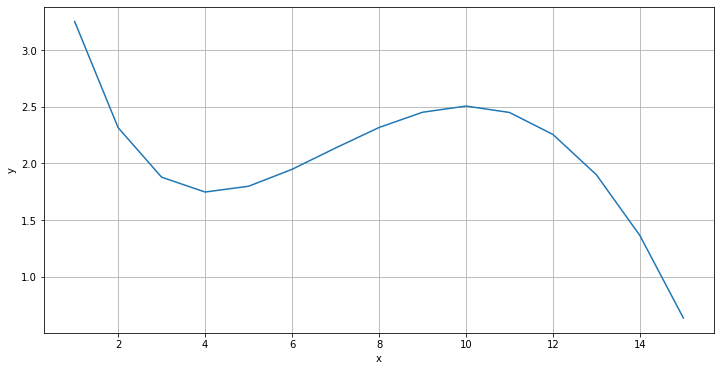

In [229]:
# Определим функцию f(x)
def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)

# Область определения функции 
vector_x = np.arange(1, 16)

# Область значений функций 
f_x = np.array([f(value) for value in vector_x])

# нарисуем f(x)
plt.figure(figsize=(12,6))
plt.plot(vector_x, vector_f_x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Как известно, многочлен степени n (т.e. ```w_0 + w_1*x + w_2*x^2 + ... + w_n*x^n```) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты ```w_0, ... w_n``` можно определить из следующей системы линейных уравнений.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

**1)** Сформируйте систему линейных уравнений (т.e. задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции ```scipy.linalg.solve```  нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию

w_0: 3.43914511139233
w_1: -0.18692824612091097


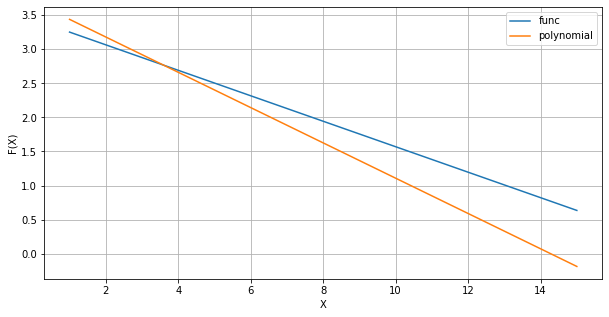

In [230]:
# Create a polunomial with order 1 (w_0 + w_1*x_1) for points 1 and 15 
rows = []
for value in [1, 15]:
    current_row = [1, value]
    rows.append(current_row)
    
A = np.array(rows)
b = np.array([f_x[0], f_x[-1]])
res = np.linalg.solve(A,b)
print(f'w_0: {res[0]}\nw_1: {res[1]}')

plt.figure(figsize=(10,5))
plt.xlabel('X')
plt.ylabel('F(X)')
plt.plot([1, 15], b , label = 'Original')
plt.plot([1, 15], res, label = 'Polynomial')
plt.grid(True)
plt.legend(['func', 'polynomial']);

**2)** Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

w_0: 3.3251294940571725
w_1: -0.06531158763007616
w_2: -0.007601041155677175


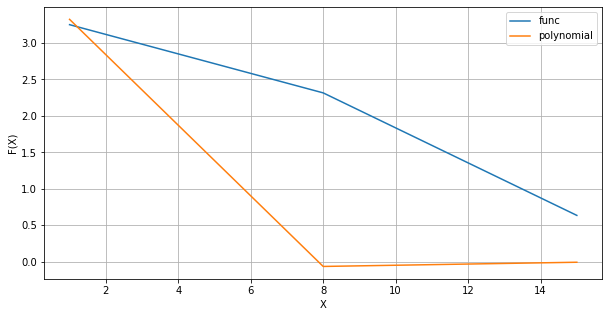

In [231]:
# Create a polunomial with order 2 (w_0 + w_1*x_1 + w_2*x_1**2) for points 1, 8 and 15 
rows = []
for value in [1, 8, 15]:
    current_row = [1, value, value**2]
    rows.append(current_row)
    
A = np.array(rows)
b = np.array([f_x[0], f_x[7], f_x[-1]])
res = np.linalg.solve(A, b)
print(f'w_0: {res[0]}\nw_1: {res[1]}\nw_2: {res[2]}')

plt.figure(figsize=(10,5))
plt.xlabel('X')
plt.ylabel('F(X)')
plt.plot([1, 8, 15], b , label = 'Original')
plt.plot([1, 8, 15], res, label = 'Polynomial')
plt.grid(True)
plt.legend(['func', 'polynomial']);

**3)** Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках: **1, 4, 10 и 15**

Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

w_0: 4.362641535118072
w_1: -1.2955258656948434
w_2: 0.1933368470215116
w_3: -0.008235651173320554


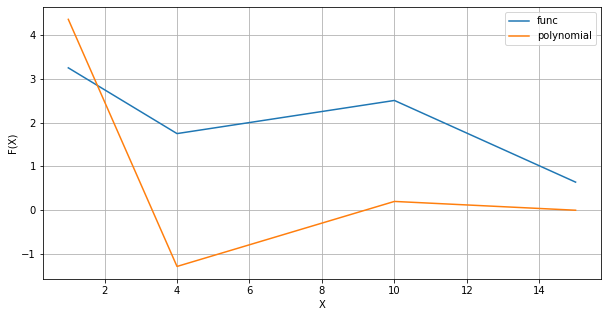

In [232]:
# Create a polunomial with order 2 (w_0 + w_1*x_1 + w_2*x_1**2) for points 1, 4, 10 and 15 
rows = []
for value in [1, 4, 10, 15]:
    current_row = [1, value, value**2, value**3]
    rows.append(current_row)
    
A = np.array(rows)
b = np.array([f_x[0], f_x[3], f_x[9], f_x[-1]])
res = np.linalg.solve(A, b)
print(f'w_0: {res[0]}\nw_1: {res[1]}\nw_2: {res[2]}\nw_3: {res[3]}')

plt.figure(figsize=(10,5))
plt.xlabel('X')
plt.ylabel('F(X)')
plt.plot([1, 4, 10, 15], b , label = 'Original')
plt.plot([1, 4, 10, 15], res, label = 'Polynomial')
plt.grid(True)
plt.legend(['func', 'polynomial']);

**4)** Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [234]:
def save_answ(f_name, data):
    with open(f_name, 'w') as file:
        file.write(' '.join([str(value) for value in data]))
        
save_answ('func_approx.txt', res)